In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import regions
from regions import Regions
from astropy.coordinates import SkyCoord
import astropy.units as u
from spectral_cube import SpectralCube

In [2]:
cont_fn = '/orange/adamginsburg/ACES/mosaics/continuum/12m_continuum_commonbeam_circular_mosaic.fits'

cont = fits.getdata(cont_fn)
head = fits.getheader(cont_fn)
ones = cont*0 + 1

In [3]:
b_min = -0.27*u.deg
b_max = 0.22*u.deg
list_b = np.arange(b_min.to(u.arcmin).value, b_max.to(u.arcmin).value+1, 0.5)*u.arcmin
list_b = list_b.to(u.deg)

l_min = -0.59*u.deg
l_max = 0.88*u.deg
list_l = np.arange(l_min.to(u.arcmin).value, l_max.to(u.arcmin).value+1, 0.5)*u.arcmin
list_l = list_l.to(u.deg)


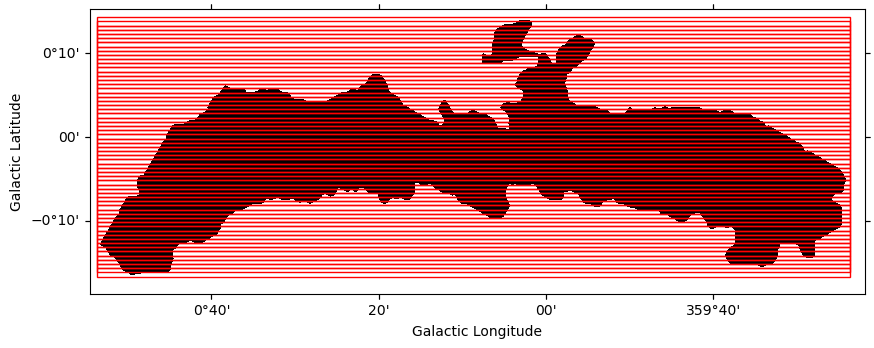

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection=WCS(head))
ax.imshow(ones, cmap='inferno')

for b in list_b:
    reg = regions.RectangleSkyRegion(center=SkyCoord(0.145*u.deg, b, frame='galactic'), width=1.5*u.deg, height=1*u.arcmin)
    reg.to_pixel(WCS(head)).plot(ax=ax, edgecolor='red', facecolor='none')

#for l in list_l:
#    reg = regions.RectangleSkyRegion(center=SkyCoord(l, -0.023*u.deg, frame='galactic'), width=1*u.arcmin, height=0.5*u.deg)
#    reg.to_pixel(WCS(head)).plot(ax=ax, edgecolor='red', facecolor='none')

ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

#reg = regions.RectangleSkyRegion(center=SkyCoord(0.145*u.deg, 0*u.deg, frame='galactic'), width=1.5*u.deg, height=1*u.arcmin)
#reg.to_pixel(WCS(head)).plot(ax=ax, edgecolor='red', facecolor='none')

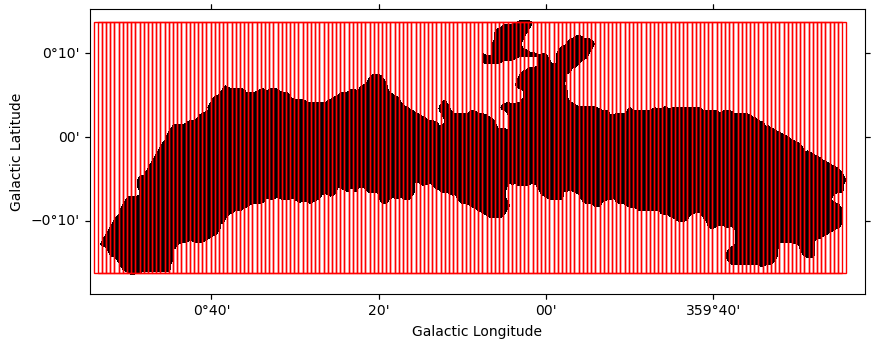

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection=WCS(head))
ax.imshow(ones, cmap='inferno')

#for b in list_b:
#    reg = regions.RectangleSkyRegion(center=SkyCoord(0.145*u.deg, b, frame='galactic'), width=1.5*u.deg, height=1*u.arcmin)
#    reg.to_pixel(WCS(head)).plot(ax=ax, edgecolor='red', facecolor='none')

for l in list_l:
    reg = regions.RectangleSkyRegion(center=SkyCoord(l, -0.022*u.deg, frame='galactic'), width=1*u.arcmin, height=0.5*u.deg)
    reg.to_pixel(WCS(head)).plot(ax=ax, edgecolor='red', facecolor='none')

ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

#reg = regions.RectangleSkyRegion(center=SkyCoord(0.145*u.deg, 0*u.deg, frame='galactic'), width=1.5*u.deg, height=1*u.arcmin)
#reg.to_pixel(WCS(head)).plot(ax=ax, edgecolor='red', facecolor='none')

In [6]:
(0.22-0.27)/2

-0.02500000000000001

In [7]:
ls /orange/adamginsburg/ACES/mosaics/cubes/

ACES_TP_spw17_mosaic.fits
ACES_TP_spw19_mosaic.fits
ACES_TP_spw21_mosaic.fits
ACES_TP_spw23_mosaic.fits
ACES_TP_spw25_mosaic.fits
ACES_TP_spw27_mosaic.fits
CS21_CubeMosaic.fits
CS21_CubeMosaic_20230910.fits.gz
CS21_CubeMosaic_20240206.fits.gz
CS21_CubeMosaic_Apr6.fits.gz
CS21_CubeMosaic_Mar16.fits.gz
CS21_CubeMosaic_downsampled9.fits
CS21_CubeMosaic_downsampled920230910.fits
CS21_CubeMosaic_downsampled9_spectrally.fits
H13CN_CubeMosaic.fits
H13CN_CubeMosaic_downsampled9.fits
H13CN_CubeMosaic_downsampled9_spectrally.fits
H13COp_CubeMosaic.fits
H13COp_CubeMosaic_downsampled9.fits
H13COp_CubeMosaic_downsampled9_spectrally.fits
HC15N_CubeMosaic.fits
HC15N_CubeMosaic_downsampled9.fits
HC15N_CubeMosaic_downsampled9_spectrally.fits
HC3N_CubeMosaic.fits
HC3N_CubeMosaic_20230910.fits.gz
HC3N_CubeMosaic_20240206.fits.gz
HC3N_CubeMosaic_downsampled9.fits
HC3N_CubeMosaic_downsampled920230910.fits
HC3N_CubeMosaic_downsampled9_20230918.fits
HC3N_CubeMosaic_downsampled9_spectrally.fits
HCOP_CubeMosai

In [2]:
from spectral_cube import SpectralCube

cube = SpectralCube.read('/orange/adamginsburg/ACES/mosaics/cubes/CS21_CubeMosaic.fits')
cube

SpectralCube with shape=(300, 4080, 11120) and unit=Jy / beam:
 n_x:  11120  type_x: GLON-TAN  unit_x: deg    range:     0.909178 deg:  359.364966 deg
 n_y:   4080  type_y: GLAT-TAN  unit_y: deg    range:    -0.311997 deg:    0.254476 deg
 n_s:    300  type_s: VRAD      unit_s: km / s  range:     -221.189 km / s:     222.674 km / s

In [10]:
reg = regions.RectangleSkyRegion(center=SkyCoord(0.145*u.deg, list_b[10], frame='galactic'), width=1.5*u.deg, height=1*u.arcmin)

In [32]:
list_b[10]

<Quantity -0.18666667 deg>

In [13]:
subcube = cube.subcube_from_regions([reg])

In [24]:
subcube.allow_huge_operations=True
pv = subcube.mean(axis=1)

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,


Text(0.5, 1.0, 'CS(2-1) 1.5x1 arcmin box at b=-0.186667 deg')

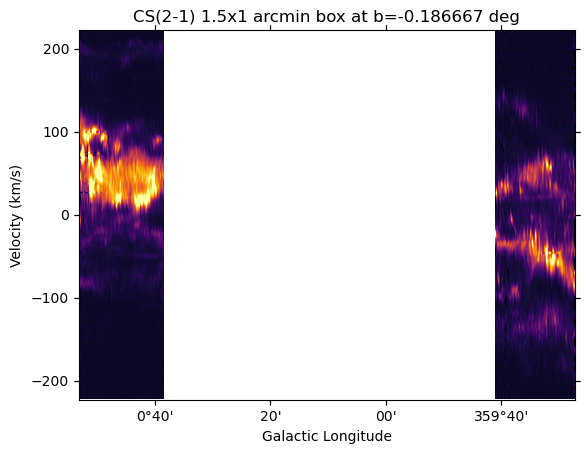

In [33]:
ax = plt.subplot(111, projection=WCS(pv.header))
ax.imshow(pv.value, cmap='inferno', aspect='auto', vmin=np.nanpercentile(pv.value, 1), vmax=np.nanpercentile(pv.value, 99))

ax11 = ax.coords[1]
ax11.set_format_unit(u.km/u.s)

ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Velocity (km/s)')
ax.set_title('CS(2-1) 1.5x1 arcmin box at b=-0.186667 deg')

In [5]:
round(list_b[11].value, 3)

-0.178